In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
import scipy 
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

In [2]:
train_data = pd.read_csv('../KaggleTitanic/kaggle_titanic_dataset/train.csv')
test_data = pd.read_csv('../KaggleTitanic/kaggle_titanic_dataset/test.csv')
print(train_data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


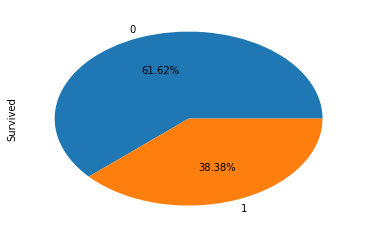

In [4]:
train_data['Survived'].value_counts().plot.pie(autopct='%1.2f%%')


In [5]:
# train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(
#             by='Survived', ascending=False)
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(
                by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


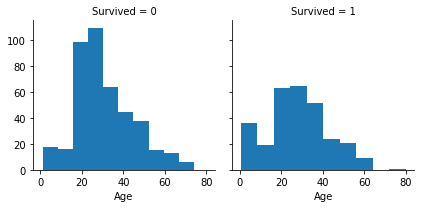

In [9]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=10)

In [10]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [11]:
#drop ticket, carbin and name feature 
print('Before drop features: ', train_data.shape, test_data.shape)
train_data = train_data.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin', 'Name'], axis=1)
print('After drop features: ', train_data.shape, test_data.shape)

Before drop features:  (891, 12) (418, 11)
After drop features:  (891, 9) (418, 8)


In [12]:
# convert categorical feature to numerical feature
# Sex
train_data['Sex'] = train_data['Sex'].map({'female':1, 'male':0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female':1, 'male':0}).astype(int)


In [24]:
# check if Embarked has missing value
train_data['Embarked'].isnull().sum()
#fill the missing value with the most common occurance value
embarked_most_freq = train_data.Embarked.dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(embarked_most_freq)


0

In [22]:
# convert categorical feature to numerical feature
# Embarked
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)
test_data.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2


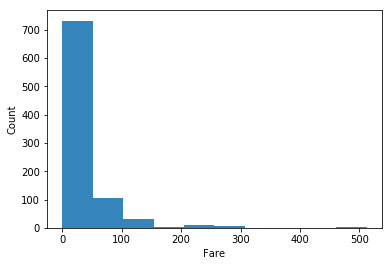

In [42]:
# analyse Fare feature
# train_data['Fare'].describe()
plt.hist(train_data['Fare'], alpha=.9)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [38]:
train_data['Fare'].isnull().sum()
test_data['Fare'].isnull().sum()
# fill the Fare missing value with median
fare_median = train_data.Fare.dropna().median()
test_data['Fare'] = test_data['Fare'].fillna(fare_median)


14.4542

In [29]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2
5,6,0,3,0,NaN,0,0,8.4583,1
6,7,0,1,0,54.0,0,0,51.8625,2
7,8,0,3,0,2.0,3,1,21.0750,2
8,9,1,3,1,27.0,0,2,11.1333,2
9,10,1,2,1,14.0,1,0,30.0708,0


In [55]:
# fill missing values in Age feature
train_data['Age'].isnull().sum(), test_data['Age'].isnull().sum()
full_data = [train_data, test_data]
for data in full_data:
    age_avg = data['Age'].mean()
    age_std = data['Age'].std()
    age_null_count = data['Age'].isnull().sum()
    age_null_random = np.random.randint(age_avg-age_std, age_avg+age_std, size=age_null_count)
    data['Age'][np.isnan(data['Age'])] = age_null_random

In [77]:
# Start to bulid the model
from sklearn.model_selection import train_test_split
X_train_all = train_data.drop(['Survived', 'PassengerId'], axis=1)
Y_train_all = train_data['Survived']
X_test_all = test_data.drop('PassengerId', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_train_all, Y_train_all, test_size=.2, random_state=23)


In [74]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score


In [79]:
# Logistic Regression
logRgr = LogisticRegression()
logRgr.fit(X_train, y_train)
prediction = logRgr.predict(X_test)
print(accuracy_score(y_test,prediction))

0.770949720670391


In [81]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gaussian': GaussianNB(),
    'Perception':  Perceptron(),
    'LinearSVC': LinearSVC(),
    'SGDClasssifier':  SGDClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=100)
}

In [111]:
maxAccuracy = float(-sys.maxsize)
for model in models:
    currentModel = models[model]
    currentModel.fit(X_train, y_train)
    prediction = currentModel.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print(str(model) + ': ' + str(accuracy))
    print('-----------------------')
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        bestModel = currentModel
print('The best model is: ' + str(bestModel) + ' ' + str(maxAccuracy))

LogisticRegression: 0.770949720670391
-----------------------
SVC: 0.664804469273743
-----------------------
KNN: 0.7150837988826816
-----------------------
Gaussian: 0.7988826815642458
-----------------------
Perception: 0.6424581005586593
-----------------------
LinearSVC: 0.6480446927374302
-----------------------
SGDClasssifier: 0.6424581005586593
-----------------------
DecisionTree: 0.8100558659217877
-----------------------
RandomForest: 0.776536312849162
-----------------------
The best model is: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.8100558659217877


In [116]:
#predict X_test_all
y = bestModel.predict(X_test_all)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2
5,3,0,14.0,0,0,9.2250,2
6,3,1,30.0,0,0,7.6292,1
7,2,0,26.0,1,1,29.0000,2
8,3,1,18.0,0,0,7.2292,0
9,3,0,21.0,2,0,24.1500,2


In [121]:
#reduce submission
id = test_data['PassengerId']
submission = pd.DataFrame({
    'PassengerId': id,
    'Survived': y
})
submission.to_csv('../KaggleTitanic/kaggle_titanic_dataset/submission.csv')